# Fashion Class Classification

## Convolutional Nueral Network/ Deep Learning
We want to build a model, in which the system processes fashion product images through multiple convolutional layers that extract hierarchical features from basic edges and textures in early layers to complex patterns and shapes in deeper layers. The CNN learns to distinguish between different fashion categories by identifying unique visual characteristics specific to each clothing type. Prime example of this, is the Amazon Echo Look Style Assistant. We'll be using Fashion-MNIST dataset, Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.

There are 10 different classes of images, as following:
0: T-shirt/top;
1: Trouser;
2: Pullover;
3: Dress;
4: Coat;
5: Sandal;
6: Shirt;
7: Sneaker;
8: Bag;
9: Ankle boot.

Image dimmensions are 28x28.

The train set and test set are given in two separate datasets.

## Basic Review:
- A grayscale image is system of 256 tones with values ranging from 0 to 255.
- '0' represents black and '255' represents white.
- Numbers in-between represents grays between black and white.
- Binary systems use digits '0' and '1', where '00000000' for black to '11111111' for white (8-bit image).ipynb_checkpoints/

## Our Fashion Dataset
- Fashion dataset contains 28X28 grayscale image with values raging from 0 to 255.
- Each image is represented by a row with 784 values.

## Importing the data

In [9]:
#let's import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#we'll import the data
fashion_train_df=pd.read_csv('fashion-mnist_train.csv', sep=',')
fashion_test_df=pd.read_csv('fashion-mnist_test.csv', sep=',')

In [10]:
#let's view the first 5 rows of the dataframe
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#let's view the last 5 samples of the dataframe
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#next, we'll explore the test dataframe
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#let's view the shape of training dataset 
fashion_train_df.shape

(60000, 785)

In [14]:
#let's view the shape of test dataset 
fashion_test_df.shape

(10000, 785)

## Visualization of the dataset

In [15]:
#let's create training and test arrays, so we can explore these arrays and actually view or visualize the data
training=np.array(fashion_train_df, dtype='float32')

In [16]:
#we'll do the same for testing dataset
testing=np.array(fashion_test_df, dtype='float32')

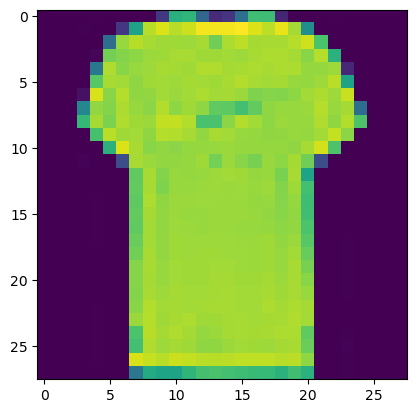

In [19]:
#let's visualize one image
plt.imshow(training[10, 1:].reshape(28,28))

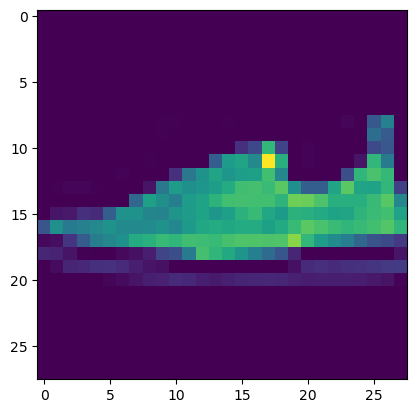

In [26]:
#we'll test this with random values, couple of numbers in the row since we have 60,000 datasets
import random
i=random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28,28))

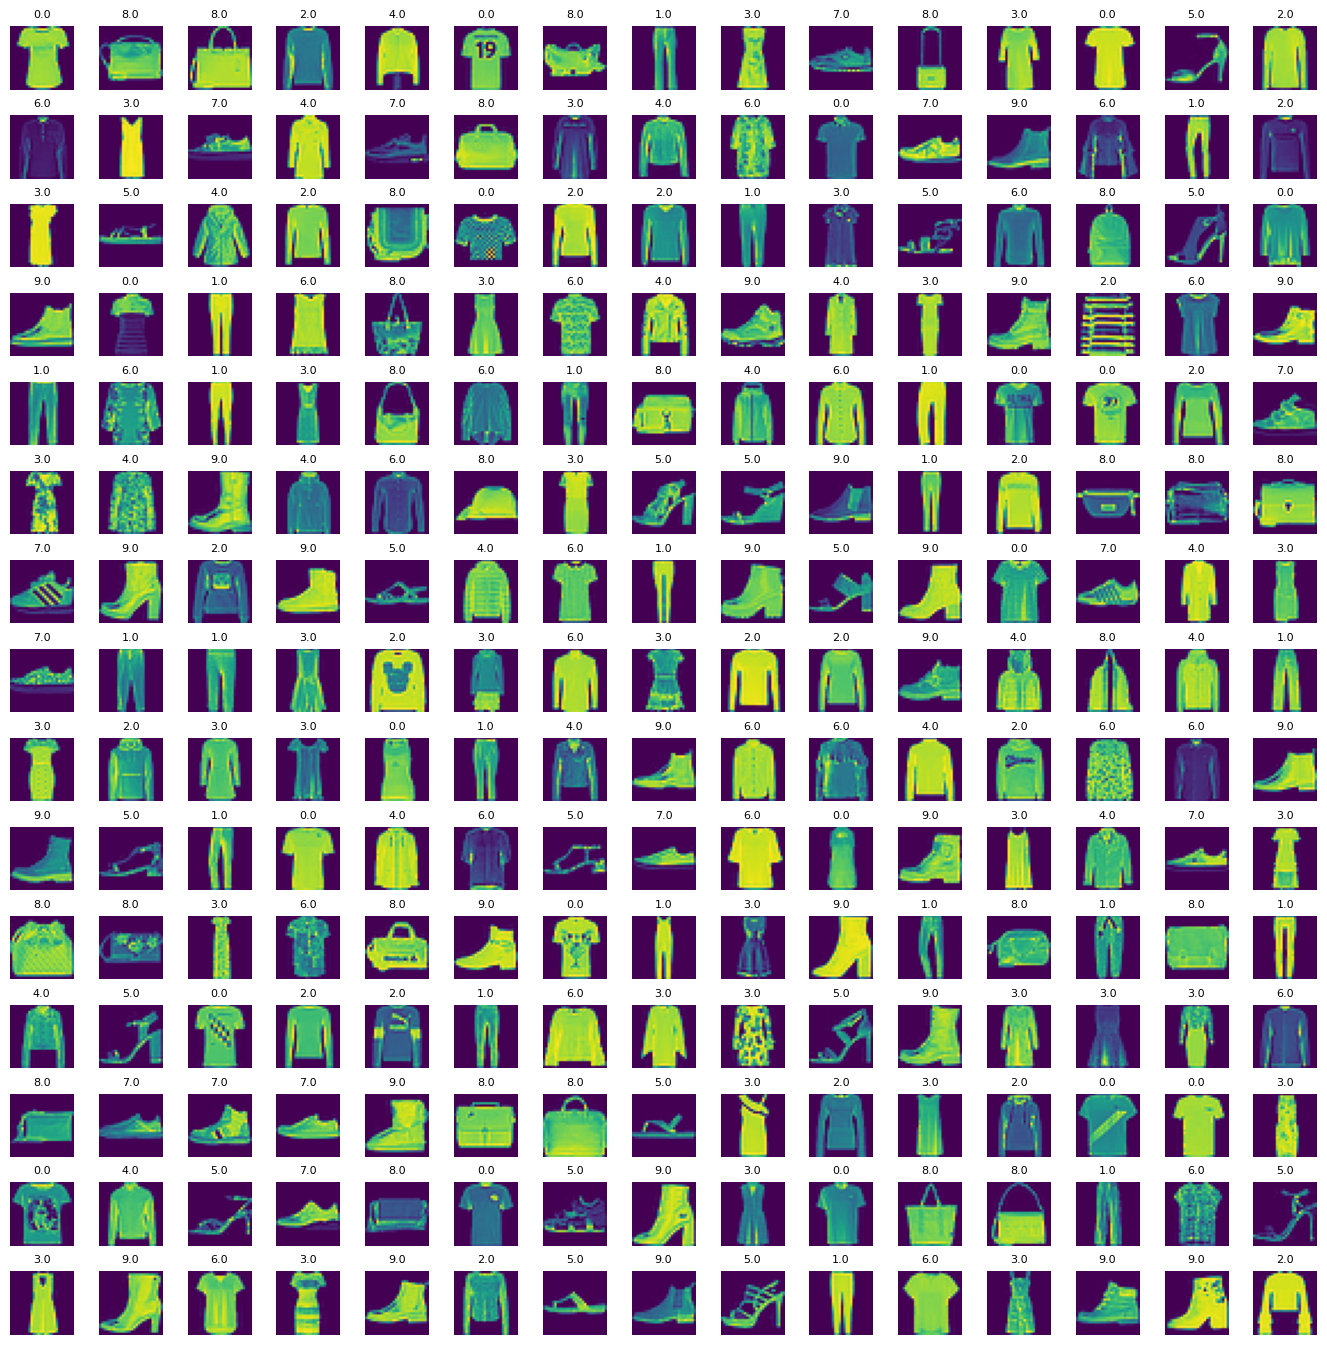

In [35]:
# we'll show the data in matrix format (in grid format)
# define the dimension of the plot grid
W_grid = 15
L_grid = 15

# subplot return the figure object and axes object
# we can use the axes object to plot specific figure at various locations
fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))

axes = axes.ravel()  # flatten the 15x15 matrix into 225 array
n_training = len(training)  # get the length of the training dataset

# loop through each subplot position
for i in range(W_grid * L_grid):  # create loop for all 225 positions
    # select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow(training[index, 1:].reshape(28, 28))
    axes[i].set_title(training[index, 0], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
plt.show()

## Model training

- we're going to use a type of neural network called Convolutional Neural Network.

### Artificial Neural Network Basics
- The neuron collects signals from input chanels named dendrites, processes information in its nucleus, and then generates an output in a long thin branch called the axon.
- Human learning occurs adaptively by varying the bond strength between these neurons

